# Tutorial 1C: Introduction to Bayesian Parameter Inference

© 2019 Manuel Razo. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

--- 

In [1]:
import numpy as np # For numerics
import scipy as sp # For scientific computing
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For (nice) plotting
sns.set(style="darkgrid") # Gray background and white grid
sns.set_context('talk') # Sets a default size for curves and fonts

# For rendering inline graphics for Python 3.6 and below
%matplotlib inline

In this tutorial we will introduce the concept and practical use of Bayesian parameter inference.

# Introduction to Bayesian Regression

This section is based on [Justin Bois](http://bois.caltech.edu/)' fantastic [data analysis course](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2018/) at Caltech.

We highly recommend you to read his introduction to bayesian parameter estimation to learn with more details what we will present here. Due to time constraints we will just go through a short primer on the topic.
As we mentioned during lecture for Bayesians probability is a measure of plausibility for any statement. For parameter estimation we want to find the probability distribution of the value of our parameters of interest. What this meains is that as Bayesians we will never say something like: "this is the value of the parameter we measure in our experiment with 100% certainty"; but rather we would report the probability distribution of the values that these parameters can take.

Since the parameter we are trying to infer given some data is the bacterial colony growth rate, this can be written in terms of Bayes theorem as 
$$
P(r \mid D) = \frac{P(D \mid r)P(r)}{P(D)},
\tag{1}
$$
where  represents our data set. Recall that each term on Bayes theorem has a name commonly used in data analysis
$$
\mbox{posterior} = \frac{\mbox{likelihood} \times \mbox{prior}}{\mbox{evidence}}
\tag{2}
$$

For our purposes of finding the posterior probability of the binding energy given the data the evidence doesn't depend on this parameter. So for this case it is just a normalization constant that we can ignore, giving us
$$
P(r \mid D) \propto P(D \mid r) P(r).
\tag{3}
$$

As researches we have to make decisions on what functional forms the likelihood and the prior will take. One of the things I personally like the most about Bayesian analysis is that every single assumption that goes into the analysis is transparent. Every researcher when performing statistical analysis is making assumptions about the data even when he/she doesn't now it. For example if you have ever used a student-t test you have implicitly assumed that your data is Gaussian distributed. But in the Bayesian framework we are under control of all of these assumptions, making the analysis very explicit and clear.

Let's go ahead and list all of the assumptions that go into our analysis.

## The likelihood $P(r \mid D)$

The likelihood, as the name indicates, tells us how likely it is that we would have observed our data given certain parameter value. In this case if the growth rate $r$ is completely off of what the most likely value is, then this term will be really small indicating that under our assumptions the data that we obtained would be very unlikely to be generated by our model given that parameter value. On the other hand if the growth rate is close to the most likely parameter value, then this term will be high, indicating that this specific choice of growth rate could have likely generated the data that we observed.

Let's list the assumptions that go into this term.

### Every datum is independent of each other

The first assumption we will make is that each datum in our data set is independent of each other. This is obviously not true for a data set such as a time series of a bacterial colony growing, but it will enormously simplify our analysis. The freedom of the Bayesian approach allows us to include into our model dependence between data points. For example if we had a reason to believe that any error in one measurement would propagate to the next one, we could include this into our analysis.

Given the laws of probability we have the "mantra" that **independence of events means to multiply probabilities**. What that means mathematically is that we will write the likelihood as
$$
P(D \mid r) = \prod_{d_i \in D} P(d_i \mid r),
\tag{4}
$$
where $d_i$ represents the  datum and $\prod_{d_i \in D}$ is read as the product of each datum  in the data set $D$.

### Gaussian likelihood for the deviations from our theoretical predictions

The likelihood contains all the information that we have on how the parameter we are trying to infer relates to our experiment. We could clasify likelihoods in two categories depending on the nature of the model we have for the data:
1. The likelihood models the deviations from the model given some deterministic relationship between parameters and data.
2. The likelihood itself could be the model if our relationship between parameters and data is probabilistic. For example if my model is itself a probability distribution of how I expect to find my data I could use that distribution directly as a model.

Our model falls into the first category. We have a deterministic relationship between growth rate and number of cells, i.e. our model doesn't tell us anything about the deviations from the mean number of cells. This means that our likelihood has to describe the distribution of deviations of the experimental data from our theoretical prediction. Note that for this we are **assuming that the model indeed describes the data**. Without getting into the philosophy of what does it mean for a model to be "correct" or not let's assume that the equation for fold-change is an accurate description of the phenomena.

Since our likelihood will describe deviations of the theoretical prediction we can say that every experimental cell area we determine is of the form
$$
M_{\exp}(t) = M_\text{theory}(t; r) + \varepsilon,
\tag{5}
$$
where the subscripts $\exp$ and $\text{theory}$ indicates experimental and theoretical growth rates respectively; $\varepsilon$ is the error or deviation from the expected theoretical prediction. If we solve for $\varepsilon$ we will find that
$$
\varepsilon(r) = M_{\exp}(t) - M_\text{theory}(t; r),
\tag{6}
$$
where we made the dependence on the growth rate $r$ explicit. That means that for a given value of our parameter $r$ we will use a statistical model for the difference between our theoretical predictions and our experimental data rather than for the experimental data directly.

For these deviations from the theoretical prediction it is common to use a Gaussian likelihood given that the powerful central limit theorem tells us that processes which involve many subprocesses tend to be Gaussian distributed (we are giving a very superficial explanation of this, for more information we highly recommend you [Sivia's outstanding book](https://www.amazon.com/Data-Analysis-Bayesian-Devinderjit-Sivia/dp/0198568320)). Therefore since we assume each data point is independent of the others our likelihood will be given by
$$
P(D \mid r, \sigma) = 
\prod_{t \in D} 
\frac{1}{\sqrt{2 \pi \sigma^2}} 
\exp \left[ \frac{ \left( M(t)_{\exp} - 
M(t; r)_\text{theory}, r) \right)^2}{2 \sigma^2} \right].
\tag{7}
$$
Notice that we added an extra parameter $\sigma$ for this Gaussian likelihood. This is a nuisance parameter that describes how the data deviates from the theoretical model; but since we are not interested on its actual value we can at the end integrate it out of our posterior probability.

Now that we have our likelihood ready let's move on to the other term, the prior. 

## The prior $P(r, \sigma)$

The prior $P(r, \sigma)$ that now includes the extra parameter $\sigma$ captures the information we knew about these parameters before performing the experiment (hence the name Prior Information). This is probably the single most controversial aspect about Bayesian statistics. Traditional statisticians claim that we can bias the outcome of our inference to be whatever we want given some arbitrary prior. But as a Bayesian, I think the prior is a natural extention of how we do science. It is important to acknowledge all the previous knowledge. There are other arguments one can give about the nature of the prior, for example:

- Since we are writing  one can think of it as an extra datum multiplying all of our data. That means given enough data if we choose a broad prior the likelihood will easily overcome the prior and the effect will be negligible.
- There are information theoretic arguments on how to choose the most uninformative prior for each parameter. Therefore by using these uniformative priors we are guaranteed to commit the least possible to what we don't know about the parameter.

The topic of choosing priors for your parameters is an entire area in and of itself. For our short introduction we will consider that there are two types of parameters  location and scale parameters. Remember that this is a very short primer and as an active area of research, this is subject to constant change and update as better methods are developed.

#### Location parameters 

This type of parameter, as their name indicates, dictate the location of the distribution. Think for example for a Gaussian distribution the mean  is a location parameter that sets where do the bell-shape curve lives. Let's look at a graphical example of this by plotting Gaussian curves with different mean $\mu$.

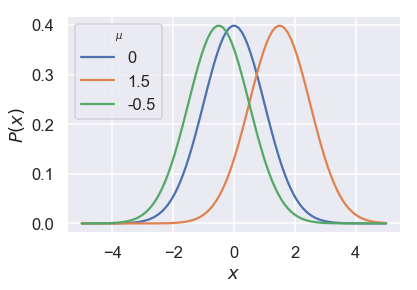

In [2]:
# Define a range of x values to evaluate the Gaussian PDF
x = np.linspace(-5, 5, 100)

# Define different mean values
mu = [0, 1.5, -0.5]

# Plot both curves on the same axis
# Loop through the different means
for m in mu:
    # Compute the probability density function (PDF)
    # for a Gaussian distribution
    pdf = sp.stats.norm.pdf(x, m, 1)
    # Plot the PDF
    plt.plot(x, pdf, label=str(m))

# Label axis
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')

# Add legend
_ = plt.legend(title=r'$\mu$')

Technically speaking these parameters are said to have translation invariance. We can exemplify this with an example borrowed from Sivia's book. Let's imagine that you are trying to determine the position of the lighthouse near the beach with respect to a boat that is anchored at some position. All you are given are a series of estimates of the position. The probability that the lighthouse lies in the infinitesimally small range between $x$ and $\delta x$ is given by
$$
\lim_{\delta x \rightarrow 0} P(x \leq X \leq x + \delta x) \approx
P(X = x) dX.
\tag{8}
$$

But whay if they told you that the data you were given was actually shifted by a distance $x_o$ because they didn't account for the length of the boat itself or some other mistake that could have happened. That would mean that every single datum you were given was actually $X + x_o$. That shouldn't affect the probability of the lighthouse of being located on a small interval since all we did was translated all the points together by the same factor (that's where the location invariance comes from). What this would imply is that
$$
P(X)dX = P(X+x_o)d(X + x_o).
\tag{9}
$$

Since $x_o$ is a constant we can define that $d(X + x_o) = dX$. Therefore to satisfy Eq. 9 it must be true that P(X) = P(X + x_o), and this can only be possible if $P(X)$ is a constant for all values of $X$. That's why location parameters are given what is called a **uniform prior**, menaing that before performing the measurement it is equaliy likely to be at any value within the allowed span.

#### Scale parameters 

Scale parameters usually determine the shape of the distributions. Going back to the graphical example we had before with the Gaussian curves, the variance $\sigma^2$ is a scale parameter since shifting its value does not translate the position of the curve, but changes the width of the distribution. Again let's quickly plot an example for different variance values.

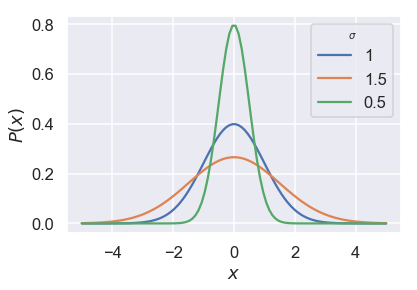

In [3]:
# Define a range of x values to evaluate the Gaussian PDF
x = np.linspace(-5, 5, 100)

# Define two different mean values
sigma = [1, 1.5, 0.5]

# Plot both curves on the same axis
# Loop through each of the vlaues for the standard deviation
for s in sigma:
    # Compute the PDF for a Gaussian distribution
    pdf = sp.stats.norm.pdf(x, 0, s)
    # Plot the PDF
    plt.plot(x, pdf, label=str(s))

# Label axis
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')

# Add legend
_ = plt.legend(title=r'$\sigma$')

These parameters are said to have scale invariance. We can again use the lighthouse example to explain what this means. Let's say that I took the data in what Jane Kondev likes to call "communist units", for example meters. You naivly thought that I was giving you "freedom units", i.e. feet. When we realized why you were having such a hard time with the data we figured out that all what you needed was to multiply each datum by a constant $\beta$ to convert back to feet. But if I analyze my data in meters and you analyze it in feet it should be true that in a small interval between $X$ and $X + \delta x$ the probabilities we get are the same as long as the intervals are equal. We write that mathematially as
$$
P(X)dX = P(\beta X)d(\beta X),
\tag{10}
$$
where again $\beta$ is the conversion factor between units (our scale parameter). Since $\beta$ is a constant it follows that d(\beta X) = \beta dX. That implies that
$$
P(X)dX = P(\beta X)\beta dX.
\tag{11}
$$

Only if I set $P(X)$ to be proportional to ${1 \over X}$ this equality will be satisfied. You can see that by substituting $P(X)$ as
$$
\frac{1}{X} dX = \frac{1}{\beta X}\beta dX.
\tag{12}
$$

This is called the Jeffreys' prior and is the most common uninformative prior for scale parameters. **Disclaimer**: On a recent interaction I had with [Michale Betancourt](https://betanalpha.github.io), an outstanding young statistitian, he told me that this prior is far from ideal for scale invariant parameters. But as a first approach to the idea we will ignore this advice for now and go ahead with this analysis. As you learn more and more about the beauty of Bayesian analysis you'll have to update your own prior information on how to perform your analysis.

Having given a short introduction to selection of prior probabilities let's choose a prior for both of our parameters.